### The goal is to predict the car model that a person is likely to choose based on their gender, annual income, the car's type, engine, and price range
### Another goal might be to predict how much someone would be likely to pay for their car based on their gender, annual income, the car's type, and its engine

### 1. Get data

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def load_data():
    url = r"https://raw.githubusercontent.com/sijiao-liu/customer-car-prediction/refs/heads/main/data/car_sales.csv"
    return pd.read_csv(url)

In [166]:
car = load_data()
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville



### 2. Explore data

2.1 Datasets information and types

In [167]:
car.info()
car.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


(23906, 16)

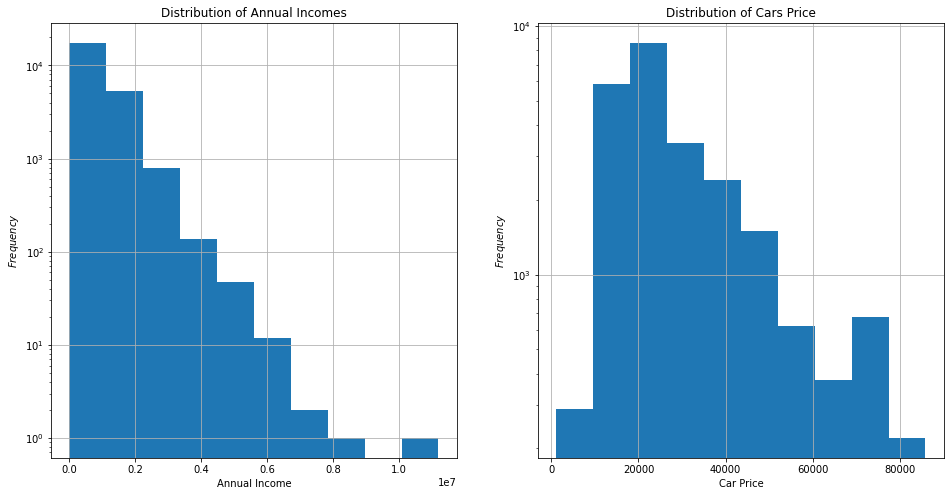

In [168]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
car["Annual Income"].hist(log=True)
plt.title("Distribution of Annual Incomes")  
plt.xlabel("Annual Income")  
plt.ylabel("$Frequency$")  

plt.subplot(1, 2, 2)
car["Price ($)"].hist(log=True)
plt.title("Distribution of Cars Price")  
plt.xlabel("Car Price")  
plt.ylabel("$Frequency$")  

plt.show()

### 3. Split data to train and test sets

In [169]:
from sklearn.model_selection import train_test_split

car_train, test = train_test_split(car, test_size=0.2, random_state=42) # 80% train set and 20% test set

### 4. Explore train set in more detail

In [170]:
car = car_train.copy() # to make naming clear, car is the train set

In [171]:
car.shape
# 19124 samples in train set

(19124, 16)

In [172]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19124 entries, 22265 to 23654
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         19124 non-null  object
 1   Date           19124 non-null  object
 2   Customer Name  19123 non-null  object
 3   Gender         19124 non-null  object
 4   Annual Income  19124 non-null  int64 
 5   Dealer_Name    19124 non-null  object
 6   Company        19124 non-null  object
 7   Model          19124 non-null  object
 8   Engine         19124 non-null  object
 9   Transmission   19124 non-null  object
 10  Color          19124 non-null  object
 11  Price ($)      19124 non-null  int64 
 12  Dealer_No      19124 non-null  object
 13  Body Style     19124 non-null  object
 14  Phone          19124 non-null  int64 
 15  Dealer_Region  19124 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.5+ MB



### 4.1 Data processing

### 4.1.1 Handling missing values


In [173]:
# first lets remove extra columns

# we're predicting the car model, basically the model would involve it's company. so company can be removed. Engine and Transmission are the same, only one of them should be kept. 

extra_columns = [
    'Car_id',
    'Customer Name',
    'Dealer_Name',
    'Company',
    'Engine',
    'Color',
    'Phone',
    'Dealer_No ',
    'Dealer_Region'
]

car = car.drop(columns=extra_columns)

# display the cleaned DataFrame
print(car.head())

             Date  Gender  Annual Income    Model Transmission  Price ($)  \
22265   12/3/2023    Male        1705000    Quest       Manual      19500   
13679   5/14/2023  Female         770000  M-Class       Manual      25000   
19336   10/8/2023    Male         560000   Xterra         Auto       9001   
11152    2/2/2023    Male        1720000       TL       Manual      14001   
20978  11/13/2023    Male         830000   Cirrus         Auto      12000   

      Body Style  
22265        SUV  
13679    Hardtop  
19336  Passenger  
11152  Hatchback  
20978  Passenger  


In [174]:
# also let's exclude Date column and store it somewhere, in case it was needed aftwerwards

# Date column should be converted to date data type 
car['Date'] = pd.to_datetime(car['Date'])

date_col = car["Date"]

car = car.drop(columns="Date")

In [175]:
# check for null values
null_values = car.isnull().sum()

print(null_values)
# no column has null value

Gender           0
Annual Income    0
Model            0
Transmission     0
Price ($)        0
Body Style       0
dtype: int64


### 4.1.2 Convert categorical variables to numerical


In [176]:
# lets remaining attributes
cols = car.columns
cols

Index(['Gender', 'Annual Income', 'Model', 'Transmission', 'Price ($)',
       'Body Style'],
      dtype='object')

In [177]:
# lets find categorical attributes
cat_columns = car.select_dtypes(include="object").columns.tolist() + car.select_dtypes(include="bool").columns.tolist()
cat_columns

['Gender', 'Model', 'Transmission', 'Body Style']

In [178]:
# label encoding for Gender -> (0, 1), Transmission -> (0, 1), Body Style -> (0,1,2,3), and Price -> create classes like, 0-20000 -> class 1, 20000-40000 -> class2, and ...

# and One-Hot Encoding for the Body Style feature
car['gender_encoded'] = car['Gender'].astype('category').cat.codes

car['engine_encoded'] = car['Transmission'].astype('category').cat.codes

bins = [0, 20000, 40000, 60000, 80000, float('inf')]  # Use float('inf') for 'above 80000'
labels = ['1', '2', '3', '4', '5']
car['price_range'] = pd.cut(car['Price ($)'], bins=bins, labels=labels, right=False) # add newly created price for ranges 

car = pd.get_dummies(car, columns=['Body Style'], prefix='BodyStyle')

car.head()

,Gender,Annual Income,Model,Transmission,Price ($),gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan
22265,Male,1705000,Quest,Manual,19500,1,1,1,False,False,False,True,False
13679,Female,770000,M-Class,Manual,25000,0,1,2,True,False,False,False,False
19336,Male,560000,Xterra,Auto,9001,1,0,1,False,False,True,False,False
11152,Male,1720000,TL,Manual,14001,1,1,1,False,True,False,False,False
20978,Male,830000,Cirrus,Auto,12000,1,0,1,False,False,True,False,False


In [179]:
car.dtypes

Gender                   object
Annual Income             int64
Model                    object
Transmission             object
Price ($)                 int64
gender_encoded             int8
engine_encoded             int8
price_range            category
BodyStyle_Hardtop          bool
BodyStyle_Hatchback        bool
BodyStyle_Passenger        bool
BodyStyle_SUV              bool
BodyStyle_Sedan            bool
dtype: object

In [180]:
# convert True, and False to 1, and 0
for col in car.columns:
    if car[col].dtype == 'bool':  # check if the column is boolean
        car[col] = car[col].astype(int) 

car.head()

,Gender,Annual Income,Model,Transmission,Price ($),gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan
22265,Male,1705000,Quest,Manual,19500,1,1,1,0,0,0,1,0
13679,Female,770000,M-Class,Manual,25000,0,1,2,1,0,0,0,0
19336,Male,560000,Xterra,Auto,9001,1,0,1,0,0,1,0,0
11152,Male,1720000,TL,Manual,14001,1,1,1,0,1,0,0,0
20978,Male,830000,Cirrus,Auto,12000,1,0,1,0,0,1,0,0


In [181]:
# drop Gender, Engine, Price ($) from the dataset

car = car.drop(columns=["Gender", "Transmission", "Price ($)"])

car.head()

,Annual Income,Model,gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan
22265,1705000,Quest,1,1,1,0,0,0,1,0
13679,770000,M-Class,0,1,2,1,0,0,0,0
19336,560000,Xterra,1,0,1,0,0,1,0,0
11152,1720000,TL,1,1,1,0,1,0,0,0
20978,830000,Cirrus,1,0,1,0,0,1,0,0


In [182]:
# move target variable, Model, to the end

car = car[[col for col in car.columns if col != 'Model'] + ['Model']]

car.head()

,Annual Income,gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan,Model
22265,1705000,1,1,1,0,0,0,1,0,Quest
13679,770000,0,1,2,1,0,0,0,0,M-Class
19336,560000,1,0,1,0,0,1,0,0,Xterra
11152,1720000,1,1,1,0,1,0,0,0,TL
20978,830000,1,0,1,0,0,1,0,0,Cirrus


In [183]:
# perfect! now let's see how many different model we have?

car["Model"].nunique()

# 154 unique model!

154

In [184]:
# again using label encoding for the models

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

car['Model'] = label_encoder.fit_transform(car['Model'])

In [185]:
# done! 

car.head()

# successfully converted all categorical variables to numerical!


,Annual Income,gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan,Model
22265,1705000,1,1,1,0,0,0,1,0,111
13679,770000,0,1,2,1,0,0,0,0,90
19336,560000,1,0,1,0,0,1,0,0,153
11152,1720000,1,1,1,0,1,0,0,0,141
20978,830000,1,0,1,0,0,1,0,0,39


### 4.1.3 Feature Scaling

In [186]:
# to scale AnnualIncome feature, by Normalization
# because income data is heavily skewed (e.g., many low values and a few very high values), we use Normalization. (reference to the histogram visualization above for the income data)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

car['Annual Income'] = scaler.fit_transform(car[['Annual Income']])

In [187]:
car.head()

,Annual Income,gender_encoded,engine_encoded,price_range,BodyStyle_Hardtop,BodyStyle_Hatchback,BodyStyle_Passenger,BodyStyle_SUV,BodyStyle_Sedan,Model
22265,0.151468,1,1,1,0,0,0,1,0,111
13679,0.067911,0,1,2,1,0,0,0,0,90
19336,0.049144,1,0,1,0,0,1,0,0,153
11152,0.152809,1,1,1,0,1,0,0,0,141
20978,0.073273,1,0,1,0,0,1,0,0,39


### 4.1.4 Correlations

In [188]:
# let's measure correlations

corr_matrix = car.corr()
corr_matrix["Model"].sort_values(ascending=False)

Model                  1.000000
engine_encoded         0.102821
BodyStyle_Passenger    0.093554
BodyStyle_Hardtop      0.068360
price_range            0.033998
gender_encoded        -0.002762
Annual Income         -0.008652
BodyStyle_Hatchback   -0.025017
BodyStyle_Sedan       -0.028004
BodyStyle_SUV         -0.080272
Name: Model, dtype: float64

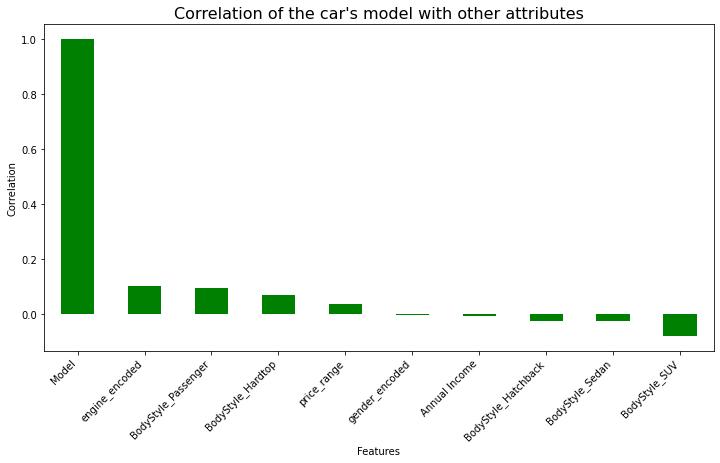

In [189]:
# visualize correlations

plt.figure(figsize=(12, 6))
corr_matrix["Model"].sort_values(ascending=False).plot(kind="bar", color="green")
plt.title("Correlation of the car's model with other attributes", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha="right")
plt.show()

In [190]:
# based on these correlations, it suggests that none of the features have a strong linear relationship with the target variable (car model). shouldn't be a surprise because we don't have a strong linear relationship

### 5. Data processing pipeline

In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Features and target
X = car_train[['Gender', 'Annual Income', 'Transmission', 'Price ($)', 'Body Style']] # Input features
y = car_train['Model']  # Categorical target

# Encode the target feature
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Column groups
categorical_features = ['Gender', 'Transmission']  # Use OrdinalEncoder
onehot_features = ['Body Style']  # Use OneHotEncoder
numerical_features_binned = ['Price ($)']  # Use KBinsDiscretizer for binning
numerical_features_scaled = ['Annual Income']  # Use MinMaxScaler

# Define preprocessing steps
preprocessing = ColumnTransformer(
    transformers=[
        ('cat_ord', OrdinalEncoder(), categorical_features),  # Encode categories
        ('cat_onehot', OneHotEncoder(), onehot_features),     # One-hot encode Body Style
        ('price_binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), numerical_features_binned),
        ('income_scaling', MinMaxScaler(), numerical_features_scaled)  # Scale Annual Income
    ]
)

### 6. Buil, train, and evaluate classification models

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

import numpy as np

# all classification models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessing),  
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X, y_encoded, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)

# results
for name, score in results.items():
    print(f"{name}: {score:.4f}")


Decision Tree: 0.1333
Random Forest: 0.1147
SVM: 0.1716
KNN: 0.1162
Naive Bayes: 0.0797


### 7. Tuning models for better accuracy

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


rf = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier()),
])

In [204]:
# train the model
rf.fit(X, y_encoded) 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_ord', OrdinalEncoder(),
                                                  ['Gender', 'Transmission']),
                                                 ('cat_onehot', OneHotEncoder(),
                                                  ['Body Style']),
                                                 ('price_binning',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='uniform'),
                                                  ['Price ($)']),
                                                 ('income_scaling',
                                                  MinMaxScaler(),
                                                  ['Annual Income'])])),
                ('random_forest', RandomForestClassifier())])

In [208]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Define the Random Forest model and pipeline
rf = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(n_estimators=100, random_state=42)),
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified KFold for balancing classes
scoring_metrics = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

# Evaluate the model
results = cross_val_score(rf, X, y_encoded, cv=cv, scoring='accuracy')

# Get the mean accuracy and standard deviation
mean_accuracy = np.mean(results)
std_accuracy = np.std(results)

# Train the model on the entire dataset
rf.fit(X, y_encoded)

# Make predictions
y_pred = rf.predict(X)

# Calculate evaluation metrics
accuracy = accuracy_score(y_encoded, y_pred)
f1 = f1_score(y_encoded, y_pred, average='macro')  # Corrected to 'macro' for multiclass
precision = precision_score(y_encoded, y_pred, average='macro')  # Corrected to 'macro' for multiclass
recall = recall_score(y_encoded, y_pred, average='macro')  # Corrected to 'macro' for multiclass
conf_matrix = confusion_matrix(y_encoded, y_pred)

print(f"Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
print(f"Overall Accuracy: {accuracy:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")


Mean Accuracy: 0.1155 (±0.0042)
Overall Accuracy: 0.6500
F1 Score (Macro): 0.6631
Precision (Macro): 0.7221
Recall (Macro): 0.6349
Confusion Matrix:
[[ 97  15   0 ...   1   0   0]
 [  0 167   0 ...   2   0   0]
 [  0   0 137 ...   0   0   0]
 ...
 [  2  12   0 ...  56   0   0]
 [  0   0   0 ...   0  75   0]
 [  0   0   0 ...   0   0  43]]
